In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mall customers - mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.drop('CustomerID' , axis=1 , inplace=True)

In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.rename(columns={'Annual Income (k$)' : 'income' , 'Spending Score (1-100)' : 'score' },inplace=True)

In [9]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


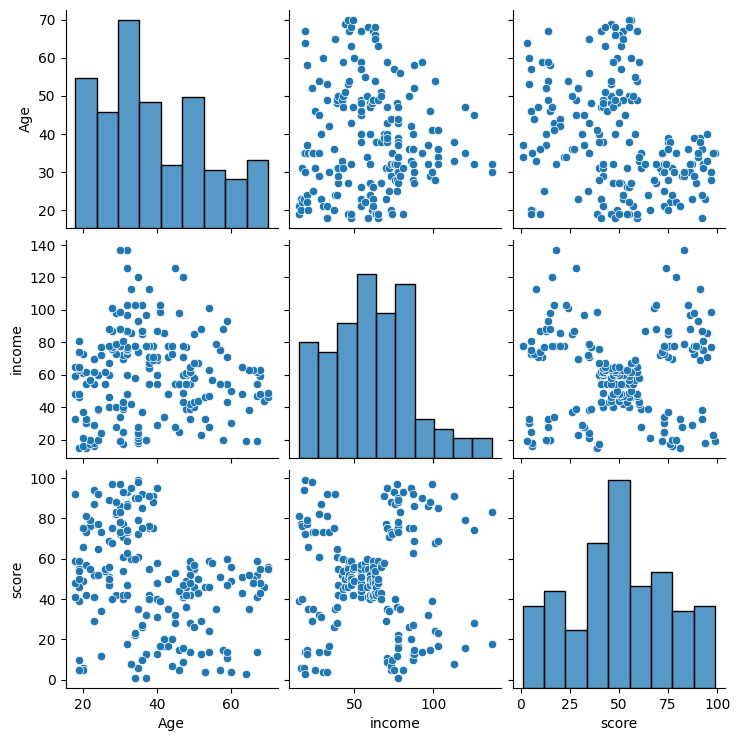

In [10]:
sns.pairplot(df[['Age','income','score']])

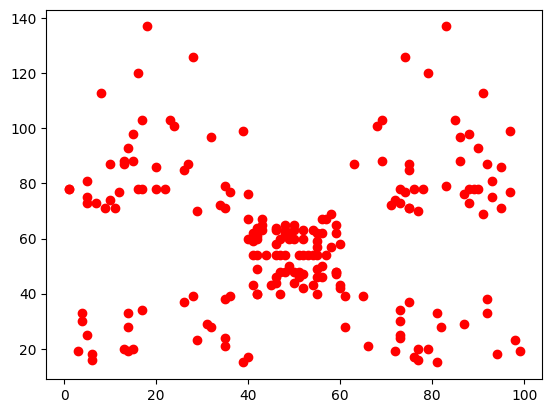

In [11]:
plt.scatter(df['score'],df['income'],c='red')

In [12]:
from sklearn.cluster import KMeans

In [19]:
wcss = []
cluster_range=range(1,15)
for k in cluster_range:
    kn = KMeans(n_clusters=k)
    kn.fit(df[['income','score']])
    wcss.append(kn.inertia_)

In [20]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25028.020475269415,
 21932.39204424098,
 19704.484807825025,
 17549.699291912577,
 15810.838613705502,
 14350.256180094417,
 12816.898555873559]

In [21]:
from kneed import KneeLocator

In [22]:
kn = KneeLocator(cluster_range, wcss, direction='decreasing', curve='convex')

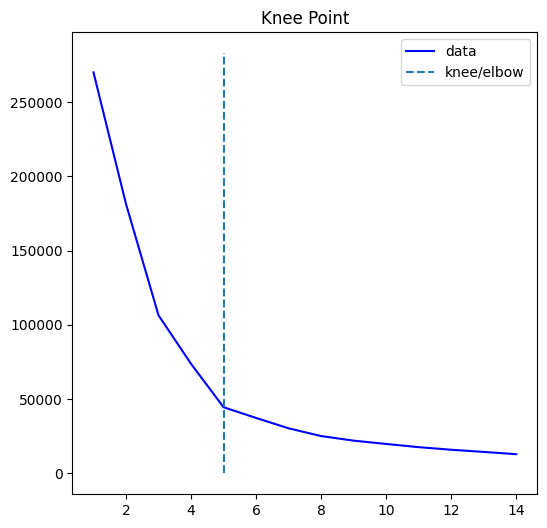

In [23]:
kn.plot_knee()

In [24]:
kn = KMeans(n_clusters=5)

In [27]:
kn.fit(df[['income','score']])

KMeans(n_clusters=5)

In [29]:
df['new_claster'] = kn.predict(df[['income','score']])

In [31]:
df.head()

,Gender,Age,income,score,new_claster
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1


In [32]:
df.new_claster.value_counts()

0    81
2    39
3    35
1    23
4    22
Name: new_claster, dtype: int64

In [38]:
df0 = df[df['new_claster'] == 0]
df1 = df[df['new_claster'] == 1]
df2 = df[df['new_claster'] == 2]
df3 = df[df['new_claster'] == 3]
df4 = df[df['new_claster'] == 4]

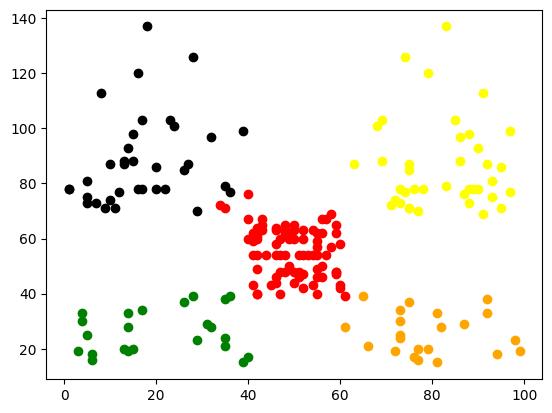

In [41]:
plt.scatter(df0.score , df0.income, c='red')
plt.scatter(df1.score , df1.income, c='green')
plt.scatter(df2.score , df2.income, c='yellow')
plt.scatter(df3.score , df3.income, c='black')
plt.scatter(df4.score , df4.income, c='orange')